# Quantification

This is a tutorial on quantification of confocal images. Images are assumed to be converted to RDS files already

### Load packages

In [1]:
library(ggplot2)
library(RCon3D)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

### Find the images

In [2]:
img <- findIMG("//a00143.science.domain/cmf483/Documents/PhD/Packages/RCon3D/Data")

## Quantify pixels for each layer for each channel

In [3]:
myq <- quant(img,channels=c("xan","pan","mic","ste"),naming=list(Time=c("24h")))

The naming argument is optional but can be used to look through the names of the images and add corresponding variables
Here it looks for "24h" in the image name, and makes a variable called Time.
This is of course only useful when there are several images with different metadata: eg. Time=c("12h","24h").

#### Plot the quantification
We reverse the x-axis (looks like y-axis because plot is flipped) because the first layers are the top of the specimen and the last the bottom.

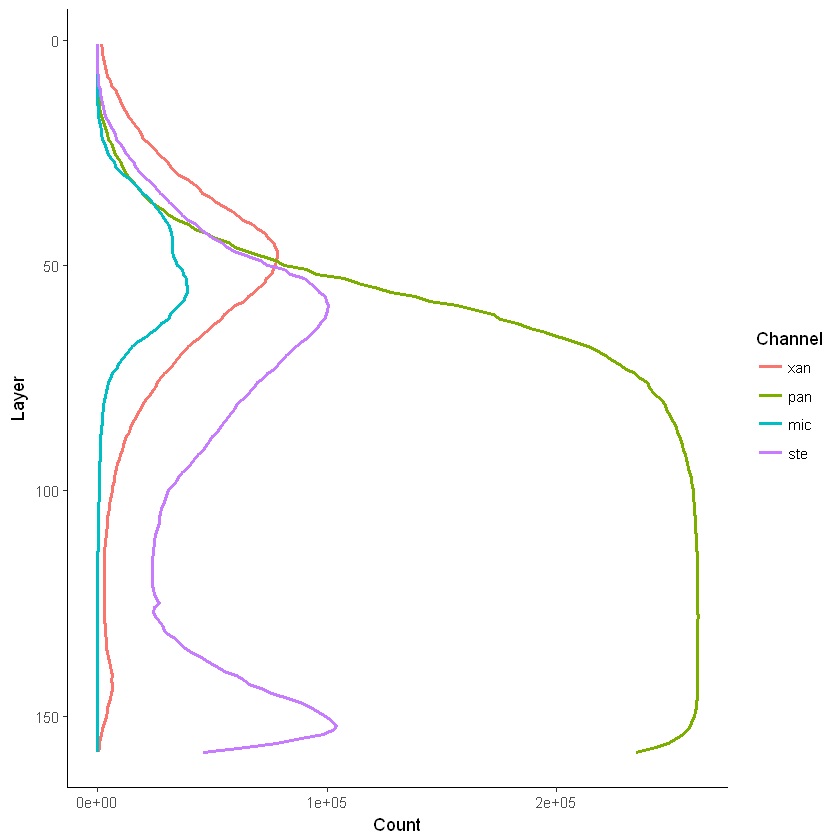

In [4]:
p <- ggplot(data = myq, aes(x = Layer,y = Count, colour = Channel, group = Channel)) +
  theme_classic() +
  geom_freqpoly(stat = "identity", position = position_dodge(width = 0), size = 1) +
  scale_x_reverse() +
  coord_flip()
p

#### Quantification for entire image

In [5]:
fullq <- aggregate(Count ~ ., data = myq[, colnames(myq) != "Layer"], FUN = sum)

If `pwidth` is the pixel width and `zstep` is the distance between the layers we can calculate the the biovolume:

In [6]:
# In microns:
pwidth <- 0.75
zstep <- 0.25

# In cubic microns
fullq$Biovolume <- fullq$Count * pwidth^2 * zstep

fullq

Img,Channel,Time,Count,Biovolume
FourSpecies24h_xan,xan,24h,3552673,499594.6
FourSpecies24h_pan,pan,24h,26685719,3752679.2
FourSpecies24h_mic,mic,24h,1291929,181677.5
FourSpecies24h_ste,ste,24h,7192105,1011389.8


## Section the quantification

We can split the image in top, middle and bottom based on various criteria.
Here we define the Top as all layers from the very top until 75 percent of the image is filled (`pt = 0.75`). The bottom is the bottom 20 layers (`add.b = 20`). The middle is the rest. Note that the top of the specimen is in the layers with the low numbers, hence `layer.start = "Top"`. `add.t` is how many layers to add to the top, after `pt` calculation (e.g. `pt = 0` and `add.t = 10` will specify the top as the top 10 layers)

In [7]:
myq.split <- layer_split(myq, layer.start = "Top", side = 512, pt = 0.75, add.b = 20, add.t = 0)

#### Plot the results

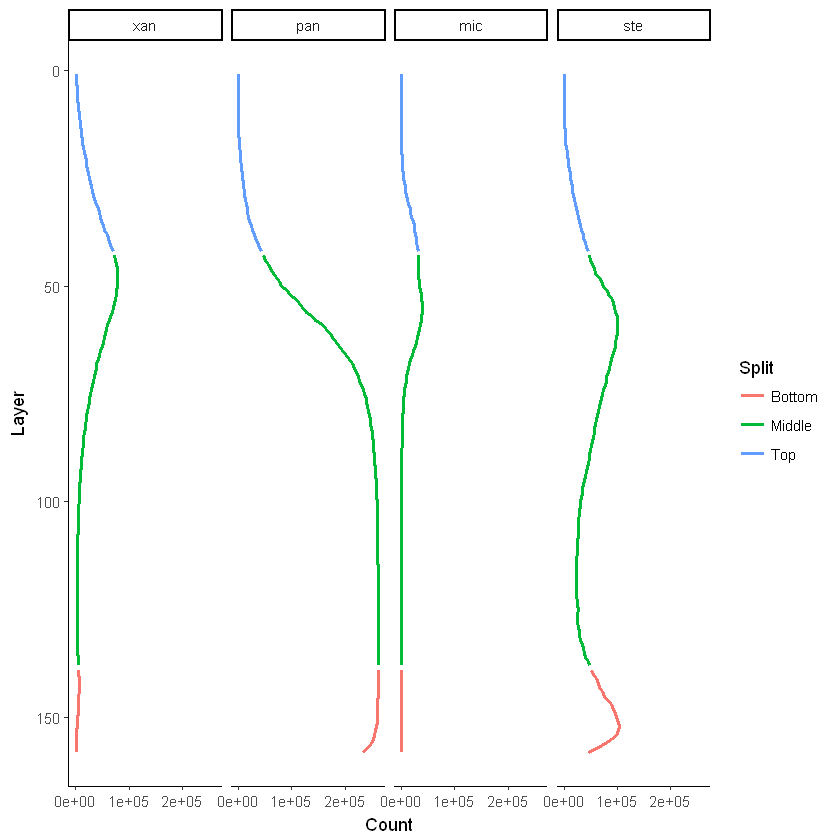

In [8]:
p <- ggplot(data = myq.split, aes(x = Layer, y = Count, colour = Split, group = Split)) +
  theme_classic() +
  geom_freqpoly(stat = "identity", position = position_dodge(width = 0), size = 1) +
  scale_x_reverse() +
  coord_flip() +
  facet_grid(.~Channel)
p